#IBM Stats Boston Dataset

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

#Task 1

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per `$10,000`
* PTRATIO - pupil-teacher ratio by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

#Task 2

Generate Descriptive Statistics

In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


For the "Median value of owner-occupied homes" provide a boxplot

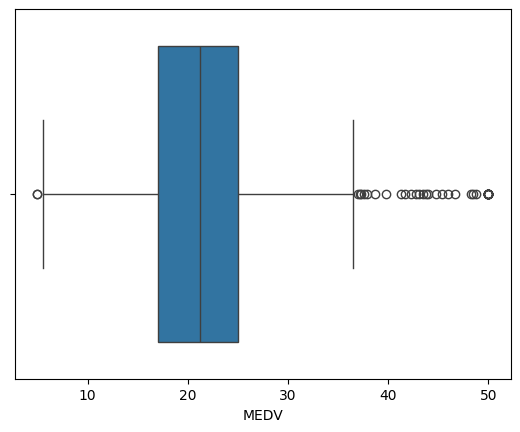

In [7]:
sns.boxplot(x=boston_df['MEDV'])
plt.show;

Provide a  bar plot for the Charles river variable

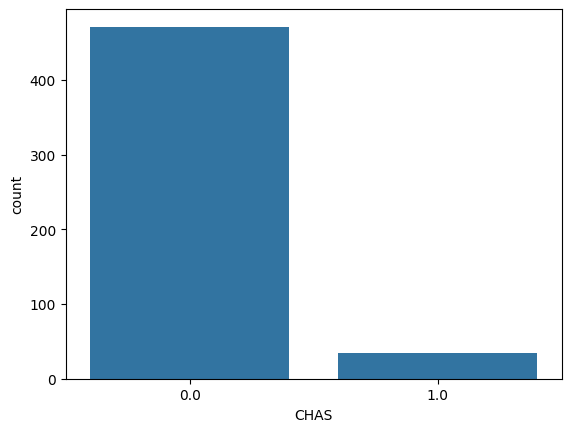

In [11]:
sns.countplot(x=boston_df['CHAS'])
plt.show;

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

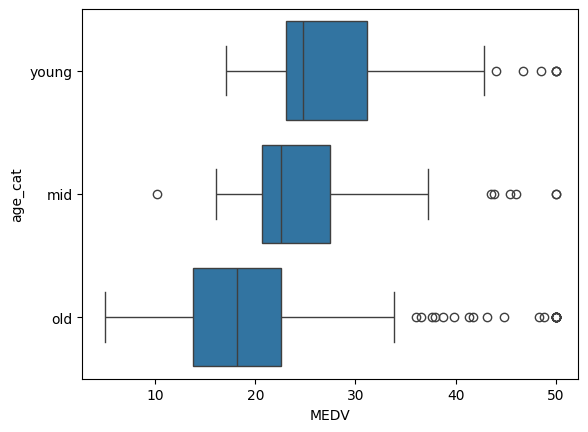

In [24]:
boston_df['age_cat'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['young', 'mid', 'old'])
sns.boxplot(x=boston_df['MEDV'], y=boston_df['age_cat'])
plt.show;

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)


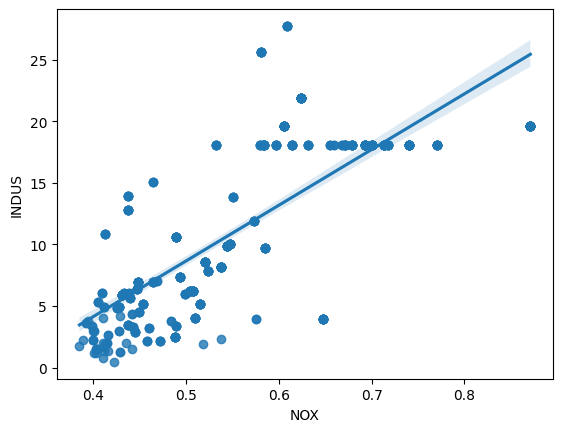

In [21]:
sns.regplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.show;
r = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(r)

Scatterplot above shows a fairly strong positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.

Create a histogram for the pupil to teacher ratio variable

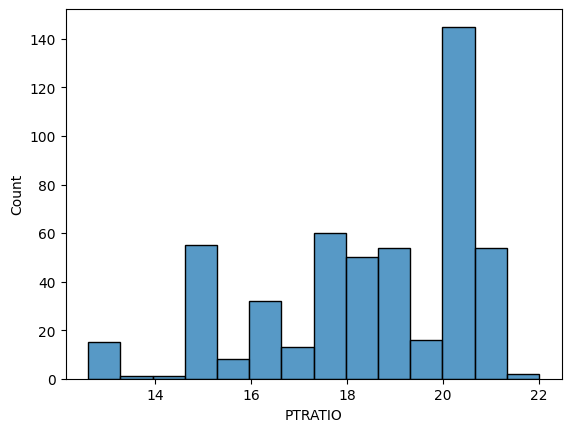

In [22]:
sns.histplot(x=boston_df['PTRATIO'])
plt.show;

#Task 3

Is there a significant difference in value of houses bounded by the Charles river or not? (T-test for independent samples) <br>

Null Hypothesis: Charles equal to Not Charles<br>
Alternative Hypothesis: Charles not equal to Not Charles

In [23]:
charles = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_charles = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = stats.ttest_ind(charles, not_charles)

print(t_stat, p_value)


3.996437466090509 7.390623170519905e-05


Conclusion: Reject the null. There is sufficient evidence of a difference.

Is there a difference in Median values of houses (MEDV) for each proportion of
owner occupied units built prior to 1940 (AGE)? (ANOVA)<br>

Null Hypothesis: All equal<br>
Alternative Hypothesis: At least one not equal

In [25]:
age_1 = boston_df[boston_df['age_cat'] == 'young']['MEDV']
age_2 = boston_df[boston_df['age_cat'] == 'mid']['MEDV']
age_3 = boston_df[boston_df['age_cat'] == 'old']['MEDV']

f_stat, p_value = stats.f_oneway(age_1, age_2, age_3)

print(f_stat, p_value)

36.40764999196599 1.7105011022702984e-15


Conclusion: Reject the null. There is sufficient evidence of a difference.

Can we conclude that there is no relationship between Nitric oxide
concentrations and proportion of non-retail business acres per town? (Pearson Correlation)<br>

Null Hypothesis: No relationship<br>
Alternative Hypothesis: Relationship

In [26]:
r, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(r, p_value)

0.7636514469209151 7.913361061239527e-98


What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypothesis: Slope of zero<br>
Alternative Hypothesis: Slope of non-zero

In [31]:
reg_results = stats.linregress(boston_df['DIS'], y = boston_df['MEDV'])

print(reg_results)

LinregressResult(slope=1.0916130158411093, intercept=18.390088330493384, rvalue=0.2499287340859039, pvalue=1.2066117273371223e-08, stderr=0.18837841478683098, intercept_stderr=0.817388708502475)


Conclusion: Reject the null. There is sufficient evidence non-zero slope.